In [31]:
# %pip install -U sentence-transformers
# %pip install plotly
from sentence_transformers import SentenceTransformer

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Data

In [22]:
# Racist Sentences
racist_sentences = [
    "People of that race are naturally more prone to criminal behavior.",
    "I'm not racist, but I wouldn't want my daughter to marry someone from that race.",
    "Those people always expect handouts from the government.",
    "They're taking our jobs and ruining the economy.",
    "You can't trust them; they're all deceitful.",
    "That neighborhood is dangerous because it's populated by niggers.",
    "They're just lazy; that's why they're unemployed.",
    "You can't expect them to understand; they're not as intelligent as us.",
    "I don't feel comfortable around them; they're so different from us.",
    "They smell bad; it's because of their race."
]

# Sexist Sentences
sexist_sentences = [
    "Women are too emotional to handle leadership positions.",
    "She's only successful because she flirted her way to the top.",
    "Men are naturally better suited for STEM fields.",
    "Why do we even bother educating girls? They'll end up as homemakers anyway.",
    "You throw like a girl.",
    "She's probably on her period; that's why she's so irritable.",
    "Women are too sensitive; they can't handle constructive criticism.",
    "Girls should focus on their looks; that's all that matters.",
    "He's such a mama's boy; no wonder he can't make his own decisions.",
    "Men should be the breadwinners; it's their role in society."
]

# Random Sentences
random_sentences = [
    "The sky is blue, and the grass is green.",
    "The quick brown fox jumps over the lazy dog.",
    "Roses are red, violets are blue, sugar is sweet, and so are you.",
    "The Earth orbits the Sun.",
    "Water boils at 100 degrees Celsius.",
    "The capital of France is Paris.",
    "Mount Everest is the tallest mountain in the world.",
    "The Mona Lisa was painted by Leonardo da Vinci.",
    "The mitochondria are the powerhouse of the cell.",
    "Bees pollinate flowers, contributing to biodiversity."
]

speeches = []
speeches += racist_sentences
speeches += sexist_sentences
speeches += random_sentences

labels = ["racist" for _ in range(len(racist_sentences))] + ["sexist" for _ in range(len(sexist_sentences))] + ["random" for _ in range(len(random_sentences))]

df = pd.DataFrame()
df["speeches"] = speeches
df["label"] = labels

df

,speeches,label
0,People of that race are naturally more prone t...,racist
1,"I'm not racist, but I wouldn't want my daughte...",racist
2,Those people always expect handouts from the g...,racist
3,They're taking our jobs and ruining the economy.,racist
4,You can't trust them; they're all deceitful.,racist
5,That neighborhood is dangerous because it's po...,racist
6,They're just lazy; that's why they're unemployed.,racist
7,You can't expect them to understand; they're n...,racist
8,I don't feel comfortable around them; they're ...,racist
9,They smell bad; it's because of their race.,racist


## Sentence Embedding

In [23]:
sentence_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
X = sentence_model.encode(speeches)

## Dimensional Reduction

In [30]:
dim = 3

reductor = PCA(dim)
# reductor = TSNE(dim)

X_emb = reductor.fit_transform(X)
df[[f"x{i}" for i in range(dim)]] = X_emb
df.head()

,speeches,label,x0,x1,x2
0,People of that race are naturally more prone t...,racist,-0.222592,0.324495,-0.213096
1,"I'm not racist, but I wouldn't want my daughte...",racist,-0.183404,0.171039,-0.354358
2,Those people always expect handouts from the g...,racist,-0.182082,0.289747,0.271569
3,They're taking our jobs and ruining the economy.,racist,-0.010360,0.395052,0.217655
4,You can't trust them; they're all deceitful.,racist,-0.365503,0.207594,-0.154180


## Clustering

In [33]:
ks = []
calinski = []
inertias = []

for k in range(3, 18):
    model = KMeans(k)
    clusters = model.fit_predict(X_emb)

    ks.append(k)
    inertias.append(model.inertia_)
    calinski.append(calinski_harabasz_score(X_emb, clusters))

best_i = np.argmax(calinski)
best_k = ks[best_i]

C:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

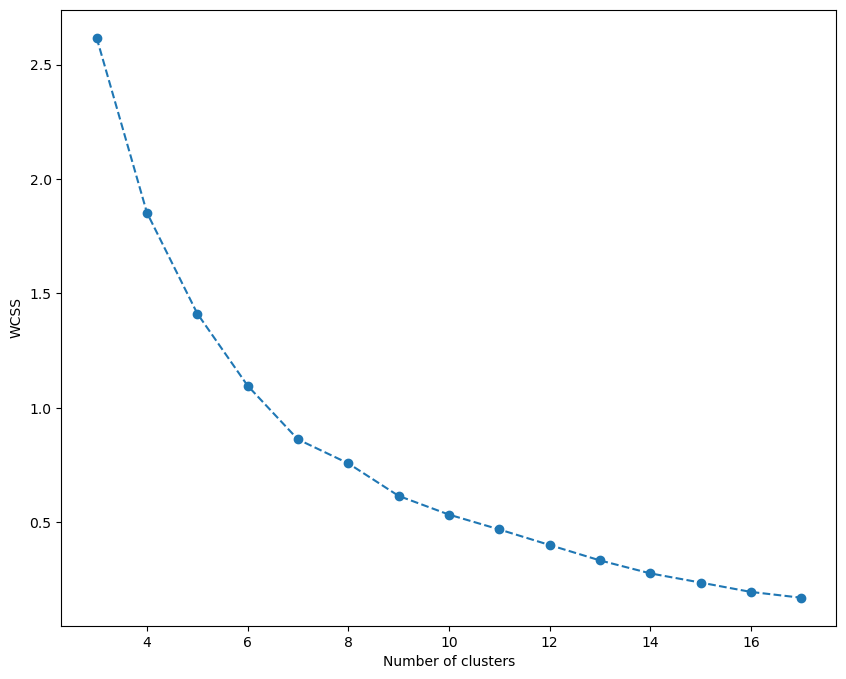

In [34]:
plt.figure(figsize=(10, 8))
plt.plot(ks, inertias, marker='o', linestyle='--')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

plt.show()

In [38]:
selected_k = 7

model = KMeans(selected_k)
clusters = model.fit_predict(X_emb)

df["cluster"] = clusters
df.head()

C:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,speeches,label,x0,x1,x2,cluster
0,People of that race are naturally more prone t...,racist,-0.222592,0.324495,-0.213096,0
1,"I'm not racist, but I wouldn't want my daughte...",racist,-0.183404,0.171039,-0.354358,0
2,Those people always expect handouts from the g...,racist,-0.182082,0.289747,0.271569,4
3,They're taking our jobs and ruining the economy.,racist,-0.010360,0.395052,0.217655,4
4,You can't trust them; they're all deceitful.,racist,-0.365503,0.207594,-0.154180,0


In [9]:
def clusterize(df, dim=2):
    sentence_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
    tsne = TSNE(dim)
    
    speeches = df["speeches"]
    speeches_embedded = sentence_model.encode(speeches)
    
    speeches_emb = tsne.fit_transform(speeches_embedded)
    df[["x", "y", "z"][:dim]] = speeches_emb
    
    ks = []
    calinski = []
    inertias = []
    for k in range(3, 18):
        model = KMeans(k)
        cluster = model.fit_predict(speeches_emb)

        ks.append(k)
        inertias.append(model.inertia_)
        calinski.append(calinski_harabasz_score(speeches_emb, cluster))
    
    best_i = np.argmax(calinski)
    best_k = ks[best_i]
    
    kmeans = KMeans(best_k)
    cluster = kmeans.fit_predict(speeches_emb)
    
    df["cluster"] = cluster
    
    return df

In [21]:

X_emb

array([[-0.22259235,  0.3244945 , -0.21309614],
       [-0.18340395,  0.17103949, -0.35435835],
       [-0.18208233,  0.28974742,  0.27156883],
       [-0.01036025,  0.39505184,  0.21765473],
       [-0.36550307,  0.20759434, -0.1541798 ],
       [ 0.02210078,  0.34882733, -0.3173578 ],
       [-0.097951  ,  0.24591886,  0.2710096 ],
       [-0.34967887,  0.28029725,  0.06015052],
       [-0.33719924,  0.24757227, -0.10113873],
       [-0.16424137,  0.40791428, -0.18005839],
       [-0.36490497, -0.38225487,  0.10740616],
       [ 0.03031723, -0.407073  , -0.11426668],
       [-0.18183403, -0.05624132,  0.4587048 ],
       [-0.3713908 , -0.208572  ,  0.24616776],
       [ 0.14320804, -0.32320133, -0.02082472],
       [-0.14781916, -0.3973742 , -0.34236038],
       [-0.4267116 , -0.3854046 , -0.04874066],
       [-0.20173334, -0.3945837 ,  0.06394056],
       [-0.03981345, -0.01807715, -0.12326358],
       [-0.18380396, -0.16591938,  0.4436214 ],
       [ 0.5852927 ,  0.13889037,  0.275

In [7]:
df

,speeches,label
0,People of that race are naturally more prone t...,racist
1,"I'm not racist, but I wouldn't want my daughte...",racist
2,Those people always expect handouts from the g...,racist
3,They're taking our jobs and ruining the economy.,racist
4,You can't trust them; they're all deceitful.,racist
5,That neighborhood is dangerous because it's po...,racist
6,They're just lazy; that's why they're unemployed.,racist
7,You can't expect them to understand; they're n...,racist
8,I don't feel comfortable around them; they're ...,racist
9,They smell bad; it's because of their race.,racist


In [10]:
clusterize(df)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\ruben\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ruben\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

ValueError: perplexity must be less than n_samples

In [11]:
speeches_embedded = model.encode(speeches)
tsne = TSNE()
speeches_2D = tsne.fit_transform(speeches_embedded)

NameError: name 'model' is not defined

In [43]:
speeches_2D

array([[17.112003  , 13.027021  ],
       [25.869207  , -6.0582275 ],
       [-0.7727344 , -0.9032487 ],
       [30.023195  ,  0.18187124],
       [-0.5148441 , 16.503704  ],
       [26.629227  ,  7.6218443 ],
       [ 9.541332  , -9.432576  ],
       [19.835423  , -3.0008805 ],
       [ 8.807683  ,  7.6588807 ],
       [18.030624  , 25.16617   ],
       [ 4.0119076 , 11.623998  ],
       [26.411993  , 21.076605  ],
       [20.146793  , 18.512903  ],
       [17.960194  , -9.748654  ],
       [30.446852  , 14.576989  ],
       [23.699217  , 13.287844  ],
       [ 5.9902225 , -3.201998  ],
       [-1.8390143 ,  7.833372  ],
       [23.459236  ,  2.105854  ],
       [13.331977  , -3.5377867 ],
       [33.427982  ,  7.148522  ],
       [13.5673895 , 18.921938  ],
       [ 9.500711  , 24.685438  ],
       [10.898239  , 13.366828  ],
       [16.863693  ,  2.3805974 ],
       [10.586528  ,  1.9383144 ],
       [20.452425  ,  7.7069893 ],
       [ 4.0430536 ,  3.8103669 ],
       [ 6.2389164 ,

In [44]:
speeches_2D[:,0]

array([17.112003 , 25.869207 , -0.7727344, 30.023195 , -0.5148441,
       26.629227 ,  9.541332 , 19.835423 ,  8.807683 , 18.030624 ,
        4.0119076, 26.411993 , 20.146793 , 17.960194 , 30.446852 ,
       23.699217 ,  5.9902225, -1.8390143, 23.459236 , 13.331977 ,
       33.427982 , 13.5673895,  9.500711 , 10.898239 , 16.863693 ,
       10.586528 , 20.452425 ,  4.0430536,  6.2389164, 14.376288 ],
      dtype=float32)

In [39]:
import plotly.graph_objects as go
import plot

fig = go.Figure(
    px.scatter(df,
        x="x0",
        y="y1",
    ))

fig.show()

NameError: name 'px' is not defined

In [56]:
ks = []
calinski = []
inertias = []

for k in range(3, 18):
    model = KMeans(k)
    cluster = model.fit_predict(speeches_2D)
    
    ks.append(k)    
    inertias.append(model.inertia_)
    calinski.append(calinski_harabasz_score(speeches_2D, cluster))

In [58]:
import numpy as np

best_i = np.argmax(calinski)
best_k = ks[best_i]

print(best_k)

4


In [47]:
from matplotlib import pyplot as pt

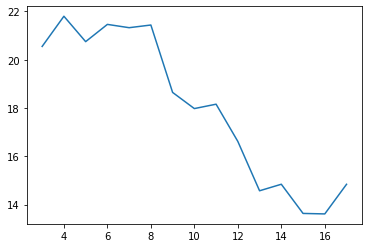

In [48]:
pt.plot(ks, val)

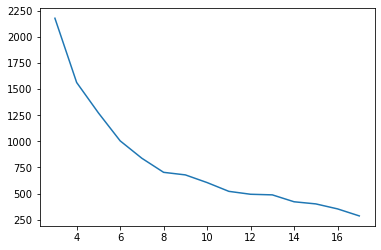

In [49]:
pt.plot(ks, inertias)